# simplot example

Code for *Modeling and Simulation in Python*

by Allen B. Downey, available from http://greenteapress.com

Copyright 2017 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT

In [1]:
from __future__ import print_function, division

%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np


In [2]:
def underride(d, **options):
    """Add key-value pairs to d only if key is not in d.

    If d is None, create a new dictionary.

    d: dictionary
    options: keyword args to add to d
    """
    if d is None:
        d = {}

    for key, val in options.items():
        d.setdefault(key, val)

    return d

In [3]:
# TODO: move these definitions into simplot.py

def color_dict():
    return dict(b='blue', g='green', r='red', c='cyan', 
                m='magenta', y='yellow', k='black', w='white')

    # http://colorbrewer2.org/?type=qualitative&scheme=Set3&n=10
    return dict(b='#80b1d3', g='#b3de69', r='#fb8072', c='#8dd3c7', 
                m='#bc80bd', y='#fdb462', k='#696969', w='#d9d9d9')

def get_color(style, kwargs, d=color_dict()):
    color = kwargs.get('color')
    if color is not None:
        return color
    
    for key, value in d.items():
        if key in style:
            return value
    
    return '#80b1d3'

def get_key(style, kwargs):
    return style, kwargs.get('color')

In [4]:
class Simplot:
    
    def __init__(self):
        self.figure_states = dict()
        
    def get_figure_state(self, figure=None):
        if figure is None:
            figure = plt.gca()
        
        try:
            return self.figure_states[figure]
        except KeyError:
            figure_state = FigureState()
            self.figure_states[figure] = figure_state
            return figure_state
    
SIMPLOT = Simplot()

In [5]:
class FigureState:
    
    def __init__(self):
        self.lines = dict()
        
    def get_line(self, style, kwargs):
        key = get_key(style, kwargs)
        
        try:
            return self.lines[key]
        except KeyError:
            line = self.make_line(style, kwargs)
            self.lines[key] = line
            return line
    
    def make_line(self, style, kwargs):
        underride(kwargs, linewidth=2, alpha=0.6)
        lines = plt.plot([], style, **kwargs)
        return lines[0]

In [6]:
def plot(*args, **kwargs):
    x = None
    y = None
    style = 'bo-'
    
    if len(args) == 1:
        y = args[0]
    elif len(args) == 2:
        if isinstance(args[1], str):
            y, style = args
        else:
            x, y = args
    elif len(args) == 3:
        x, y, style = args
    
    figure = plt.gcf()
    figure_state = SIMPLOT.get_figure_state(figure)
    line = figure_state.get_line(style, kwargs)
    
    ys = line.get_ydata()
    ys = np.append(ys, y)
    line.set_ydata(ys)
    
    if x is None:
        xs = np.arange(len(ys))
    else:
        xs = line.get_xdata()
        xs = np.append(xs, x)
    
    line.set_xdata(xs)
    
    #print(line.get_xdata())
    #print(line.get_ydata())
    
    axes = plt.gca()
    axes.relim()
    axes.autoscale_view()
    figure.canvas.draw()
    
def newplot():
    plt.figure()
    
def labels(ylabel, xlabel, title=None, **kwargs):
    plt.ylabel(ylabel, **kwargs)
    plt.xlabel(xlabel, **kwargs)
    plt.title(title, **kwargs)

<IPython.core.display.Javascript object>


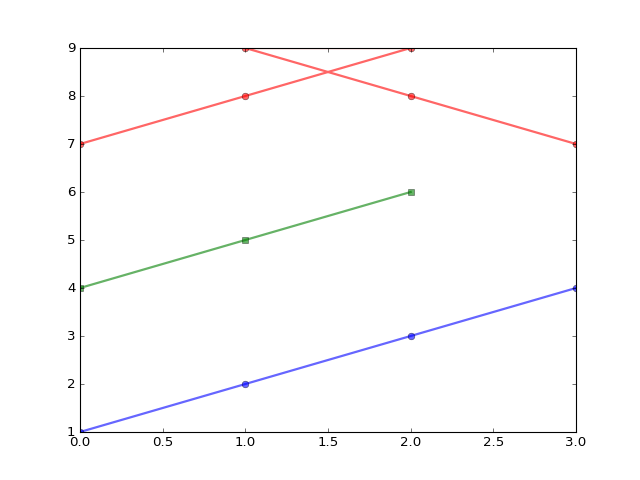

In [7]:
newplot()

In [8]:
plot(1)

In [9]:
plot([2,3,4])

In [10]:
plot([4,5,6], 'gs-')

In [11]:
plot([7,8,9], color='red')

In [12]:
plot([1,2,3], [9,8,7], color='red')

<IPython.core.display.Javascript object>


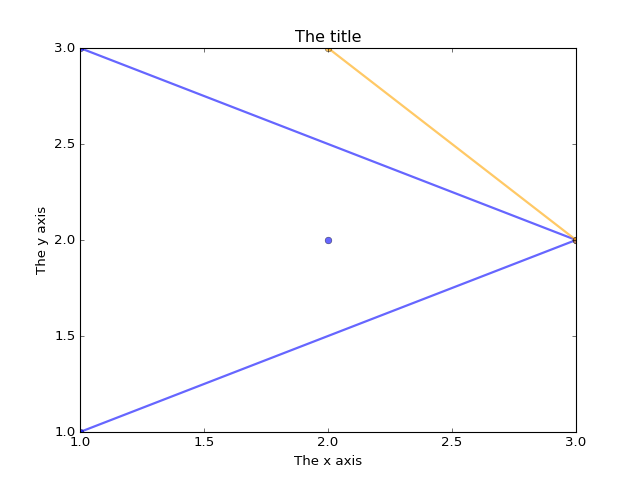

In [13]:
newplot()

In [14]:
plot(1, 1, 'bo-')

In [15]:
plot(2, 2, 'bo')

In [16]:
plot(3, 2, 'bo-')

In [17]:
plot(3, 2, color='orange')

In [18]:
plot(2, 3, color='orange')

In [19]:
plot(1, 3)

In [20]:
labels('The y axis', 'The x axis', 'The title')

<IPython.core.display.Javascript object>


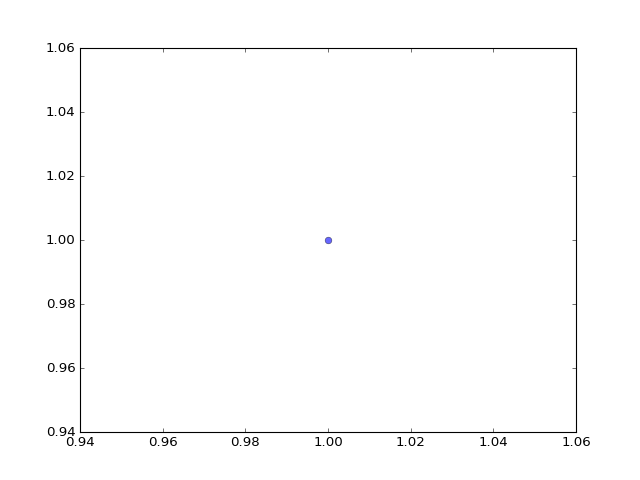

In [21]:
figure2 = newplot()

In [22]:
plot(1, 1)

<IPython.core.display.Javascript object>


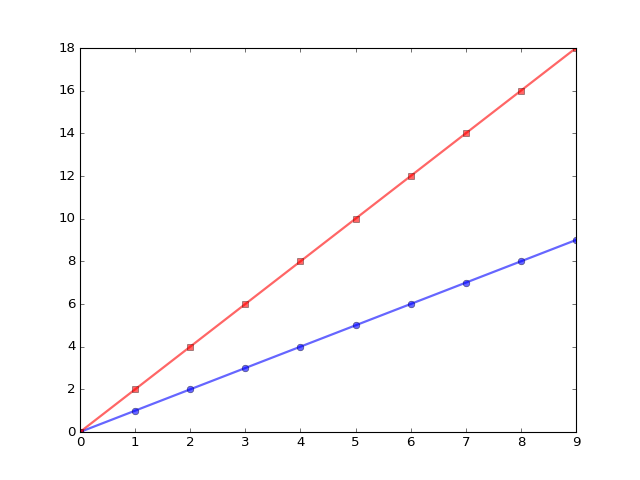

In [23]:
newplot()

for i in range(10):
    plot(i, i, 'bo-')
    plot(i, 2*i, 'rs-')

<IPython.core.display.Javascript object>


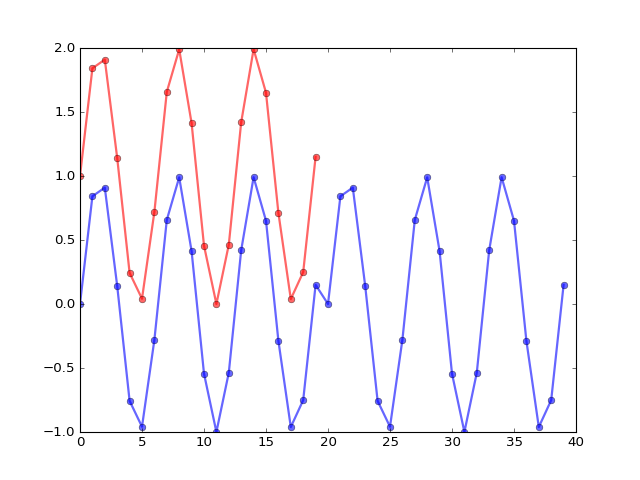

In [24]:
newplot()

In [25]:
xs = np.arange(20)
ys = np.sin(xs)
plot(xs, ys)

In [26]:
plot(xs, ys+1, color='red')

In [27]:
plot(xs+20, ys)